In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import statsmodels.api as sm
from scipy.stats import norm

In [2]:
S0 = 5600
K = 5600 
T = 0.25 
r = 0.04 
sigma_monthly = 0.047
sigma_annual = sigma_monthly * np.sqrt(12)
N = 1000
sigma=0.047*np.sqrt(12)

In [3]:
#questiona
def black_scholes(S0, K, r, T, sigma, option_type): # function for BSM model
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "Call":
        option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "Put":
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Please input 'Call' or 'Put'.")
    
    return option_price, d1

In [4]:
option_price, _ = black_scholes(S0, K, r, T, sigma, option_type="Call")

print(option_price)

210.13631171036286


In [5]:
contract_size = 100  
num_contracts = 10 

total_amount = option_price * contract_size * num_contracts
print(total_amount)

210136.31171036285


C:\Users\archi\AppData\Local\Temp\ipykernel_10904\3216917393.py:3: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


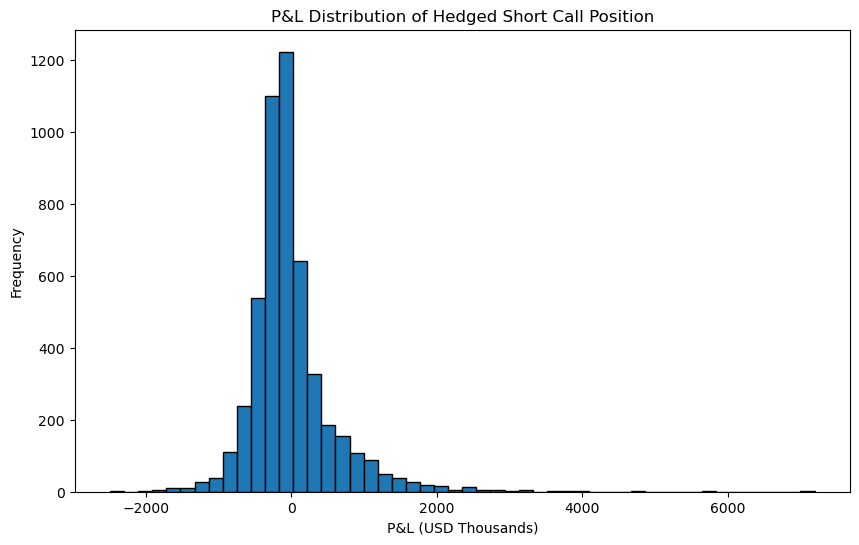

In [17]:
#question b
S0 = 5600 
K = 5600  
T = 13/52
r = 0.04 
sigma=0.047*np.sqrt(12)
mu = 0.06 

num_paths = 5000
num_steps = 13 
dt = T / num_steps
num_contracts = 10
contract_size = 100


def generate_paths(S0, mu, sigma, T, num_steps, num_paths):
    dt = T / num_steps
    paths = np.zeros((num_paths, num_steps + 1))
    paths[:, 0] = S0
    for i in range(1, num_steps + 1):
        dW = np.random.normal(0, np.sqrt(dt), num_paths)
        paths[:, i] = paths[:, i-1] * np.exp((mu - 0.5*sigma**2)*dt + sigma*dW)
    return paths

# Simulate hedging strategy
def simulate_hedging(paths, K, T, r, sigma, num_steps):
    dt = T / num_steps
    num_paths = paths.shape[0]
    option_values = np.zeros((num_paths, num_steps + 1))
    hedge = np.zeros((num_paths, num_steps + 1))
    deltas = np.zeros((num_paths, num_steps + 1))
    payoff = np.zeros((num_paths, num_steps + 1))
    
    for i in range(num_steps + 1):
        t = i * dt
        option_values[:, i], deltas[:, i] = black_scholes(paths[:, i], K, r, T-t, sigma, "Call")
        
        if i == 0:
            hedge[:, 0] = option_values[:, 0]
        else:
            stock = deltas[:, i-1] * paths[:, i]
            payoff = np.maximum(paths[:, -1] - K, 0)
            cash = hedge[:,i-1] - deltas[:, i-1] * paths[:, i-1]
            hedge[:, i] = stock + cash * np.exp(r*dt)
    
    return option_values, hedge, deltas, payoff

# Run simulation
paths = generate_paths(S0, mu, sigma, T, num_steps, num_paths)
option_values, hedge, deltas, payoff = simulate_hedging(paths, K, T, r, sigma, num_steps)

# Calculate P&L
initial_option_value = option_values[0, 0]

final_hedge_value = hedge[:, -1]

pnl = ( - payoff + final_hedge_value) * num_contracts * contract_size

# Plot histogram of P&L
plt.figure(figsize=(10, 6))
plt.hist(pnl/ 1e3, bins=50, edgecolor='black')
plt.title('P&L Distribution of Hedged Short Call Position')
plt.xlabel('P&L (USD Thousands)')
plt.ylabel('Frequency')
plt.show()


C:\Users\archi\AppData\Local\Temp\ipykernel_10904\3216917393.py:3: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


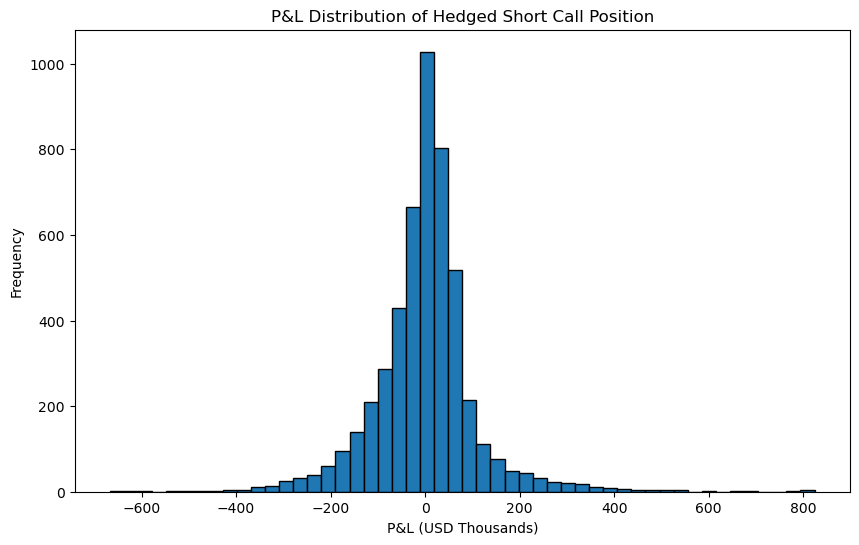

In [19]:
#question c monthly

S0 = 5600  # Initial S&P-500 index value
K = 5600  # Strike price
T = 3/12  # Time to maturity (3 months)
r = 0.04  # Risk-free rate (annualized)
sigma = 0.047  # Volatility (you should replace this with your calculated value)
mu = 0.06  # Annual growth rate of S&P-500 under P measure

num_paths = 5000
num_steps = 3  # Monthly adjustments for 3 months
dt = T / num_steps
num_contracts = 10
contract_size = 100

# Run simulation
paths = generate_paths(S0, mu, sigma, T, num_steps, num_paths)
option_values, hedge, deltas, payoff = simulate_hedging(paths, K, T, r, sigma, num_steps)

# Calculate P&L
initial_option_value = option_values[0, 0]

final_hedge_value = hedge[:, -1]

pnl = ( - payoff + final_hedge_value) * num_contracts * contract_size

# Plot histogram of P&L
plt.figure(figsize=(10, 6))
plt.hist(pnl/1e3, bins=50, edgecolor='black')
plt.title('P&L Distribution of Hedged Short Call Position')
plt.xlabel('P&L (USD Thousands)')
plt.ylabel('Frequency')
plt.show()


C:\Users\archi\AppData\Local\Temp\ipykernel_10904\3216917393.py:3: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


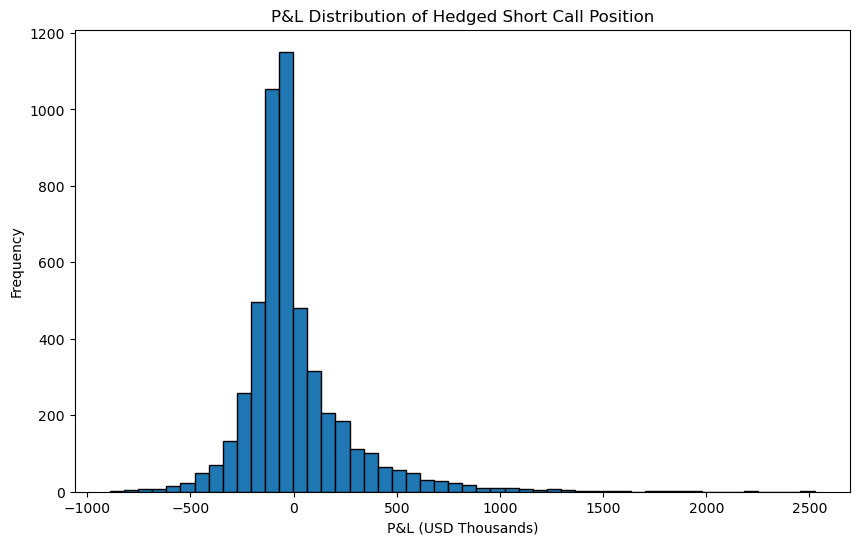

In [23]:
#question d

S0 = 5600  # Initial S&P-500 index value
K = 5600  # Strike price
T = 63/252  # Time to maturity (3 months)
r = 0.04  # Risk-free rate (annualized)
sigma = 0.047  # Volatility (you should replace this with your calculated value)
mu = 0.06  # Annual growth rate of S&P-500 under P measure3
num_paths = 5000
num_steps = 63
dt = T / num_steps
num_contracts = 10
contract_size = 100

# Run simulation
paths = generate_paths(S0, mu, sigma, T, num_steps, num_paths)
option_values, hedge, deltas, payoff = simulate_hedging(paths, K, T, r, sigma, num_steps)

# Calculate P&L
initial_option_value = option_values[0, 0]

final_hedge_value = hedge[:, -1]

pnl = ( - payoff + final_hedge_value) * num_contracts * contract_size

# Plot histogram of P&L
plt.figure(figsize=(10, 6))
plt.hist(pnl/ 1e3, bins=50, edgecolor='black')
plt.title('P&L Distribution of Hedged Short Call Position')
plt.xlabel('P&L (USD Thousands)')
plt.ylabel('Frequency')
plt.show()


C:\Users\archi\AppData\Local\Temp\ipykernel_10904\3216917393.py:3: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


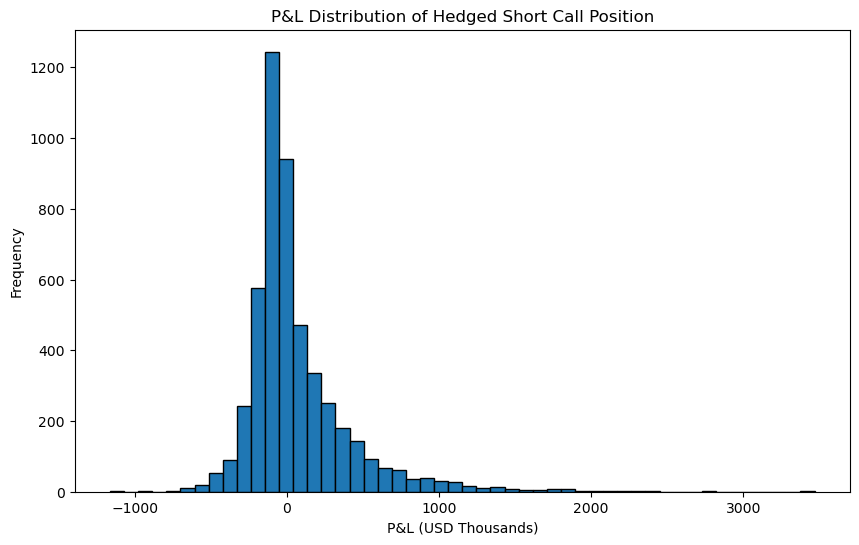

In [25]:
#question d

S0 = 5600  # Initial S&P-500 index value
K = 5600  # Strike price
T = 63/252  # Time to maturity (3 months)
r = 0.04  # Risk-free rate (annualized)
sigma = 0.047  # Volatility (you should replace this with your calculated value)
mu = 0.1  # Annual growth rate of S&P-500 under P measure3
num_paths = 5000
num_steps = 63
dt = T / num_steps
num_contracts = 10
contract_size = 100

# Run simulation
paths = generate_paths(S0, mu, sigma, T, num_steps, num_paths)
option_values, hedge, deltas, payoff = simulate_hedging(paths, K, T, r, sigma, num_steps)

# Calculate P&L
initial_option_value = option_values[0, 0]

final_hedge_value = hedge[:, -1]

pnl = ( - payoff + final_hedge_value) * num_contracts * contract_size

# Plot histogram of P&L
plt.figure(figsize=(10, 6))
plt.hist(pnl/ 1e3, bins=50, edgecolor='black')
plt.title('P&L Distribution of Hedged Short Call Position')
plt.xlabel('P&L (USD Thousands)')
plt.ylabel('Frequency')
plt.show()


C:\Users\rwe20\AppData\Local\Temp\ipykernel_31344\3216917393.py:3: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


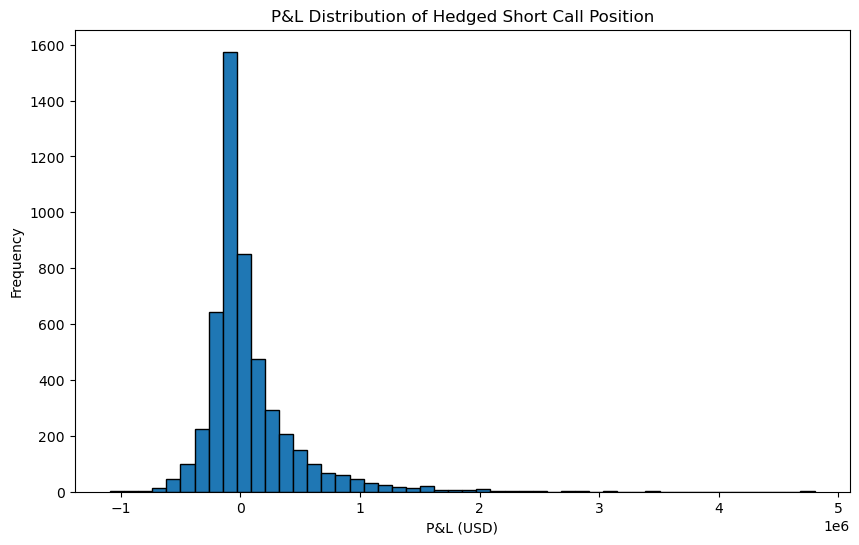

In [220]:
sigma = 0.05
paths = generate_paths(S0, mu, sigma, T, num_steps, num_paths)
option_values, hedge, deltas, payoff = simulate_hedging(paths, K, T, r, sigma, num_steps)

# Calculate P&L
initial_option_value = option_values[0, 0]

final_hedge_value = hedge[:, -1]

pnl = ( - payoff + final_hedge_value) * num_contracts * contract_size

# Plot histogram of P&L
plt.figure(figsize=(10, 6))
plt.hist(pnl, bins=50, edgecolor='black')
plt.title('P&L Distribution of Hedged Short Call Position')
plt.xlabel('P&L (USD)')
plt.ylabel('Frequency')
plt.show()